# Pymaceuticals Inc.
---

### Analysis

### - Capomulin was the most used drug regimen in the mice tested.
### - Ramicane had the most succes in reducing tumor size during the treatment.
### - Tumor volume increased with the average weight of mice while using Capomulin.
 
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how = 'left', on = ['Mouse ID'])

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice.
len(complete_data['Mouse ID'].unique())

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
len(duplicate)

5

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate 
show_duplicates= complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
Name: count, dtype: int64

In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [30]:
# Checking the number of mice in the clean DataFrame.
clean_df = complete_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg = clean_df.groupby(['Drug Regimen'])
mean = drug_reg['Tumor Volume (mm3)'].mean()
median = drug_reg['Tumor Volume (mm3)'].median()
variance = drug_reg['Tumor Volume (mm3)'].var()
std = drug_reg['Tumor Volume (mm3)'].std()
sem = drug_reg['Tumor Volume (mm3)'].sem()

tumor_summary = pd.DataFrame({ 'Mean Tumor Volume' : mean,
                                  "Median Tumor Volume" : median,
                                  'Variance Tumor Volume' : variance,
                                  'Standard Deviation Tumor Volume' :std,
                                  'SEM Tumor Volume' : sem
                             })
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_agg = drug_reg['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 'sem'])

tumor_summary_agg = tumor_summary_agg.rename(columns = {'mean' : 'Mean Tumor Volume',
                                                        'median' : 'Median Tumor Volume',
                                                        'var' : 'Variance Tumor Volume',
                                                        'std' : 'Standard Deviation Tumor Volume',
                                                        'sem' : "SEM Tumor Volume"
                                                    
                                                       })
tumor_summary_agg

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

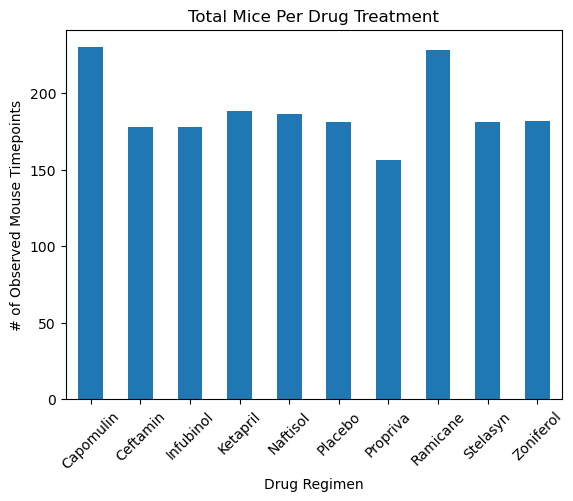

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']
bar_pan = timepoints.plot.bar(x = "Drug Regimen", y = 'Mouse ID', rot = 45)
plt.title('Total Mice Per Drug Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

<function matplotlib.pyplot.show(close=None, block=None)>

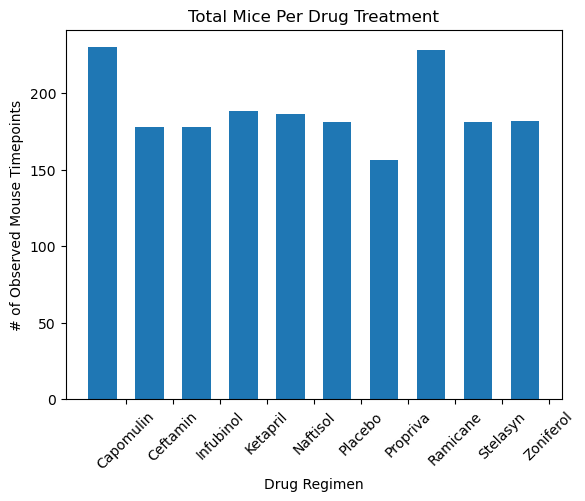

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(timepoints))
y_axis = timepoints
plt.bar(x_axis, y_axis, width = 0.6, align = "center")
ticks = [value + 0.5 for value in x_axis]
plt.xticks(ticks, timepoints.index.values, rotation = 45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Mice Per Drug Treatment')
plt.show

<Axes: title={'center': 'Sex Distribution Among Treated Mice'}>

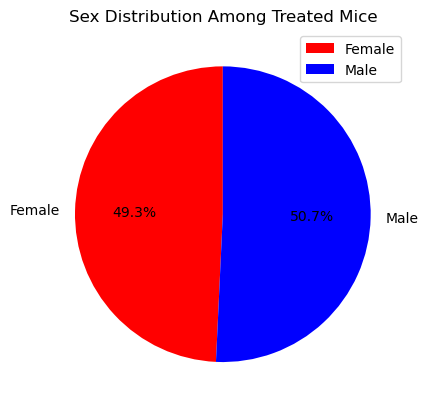

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df.groupby(['Sex']).count()
gender
pie_pan = gender.plot.pie(y = 'Mouse ID', title = ('Sex Distribution Among Treated Mice'), colors = ['red', 'blue'], startangle = 90, autopct = '%1.1f%%')
pie_pan.set_ylabel('')
pie_pan


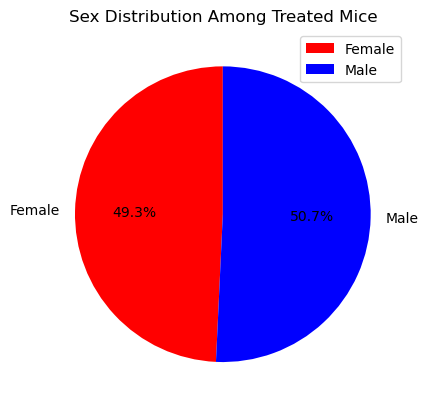

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender
labels = ['Female', 'Male']
colors = ['red', 'blue']

plt.pie(gender['Mouse ID'], labels = labels, colors = colors, startangle = 90, autopct = '%1.1f%%')
plt.title('Sex Distribution Among Treated Mice')
plt.legend(labels, loc = 'best')

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_vol = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
final_vol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged = pd.merge(final_vol, clean_df, on = (['Mouse ID', 'Timepoint']))
final_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_merged.loc[final_merged['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f' {treatment} potential outliers: {lower_bound}, {upper_bound}')

 Capomulin potential outliers: 20.70456164999999, 51.83201549
 Ramicane potential outliers: 17.912664470000003, 54.30681135
 Infubinol potential outliers: 36.83290494999999, 82.74144559000001
 Ceftamin potential outliers: 25.355449580000002, 87.66645829999999


([<matplotlib.axis.XTick at 0x156f257b3a0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

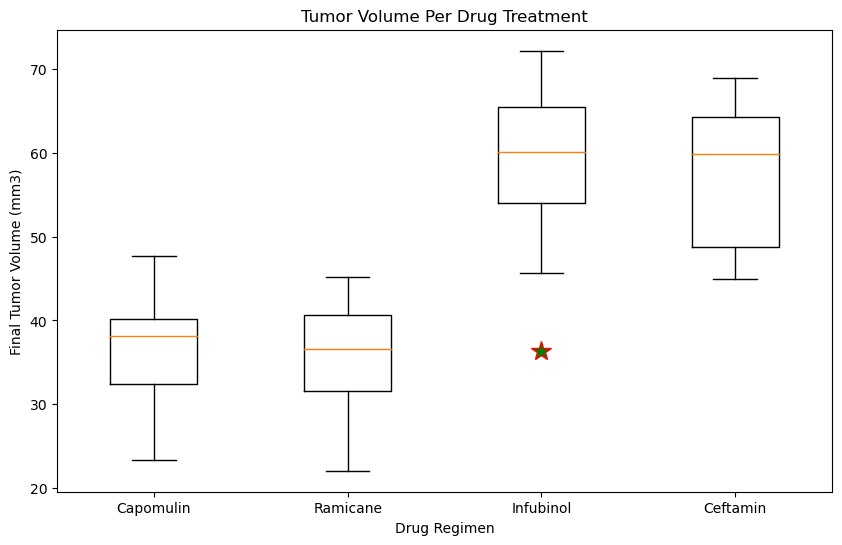

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots(figsize = (10,6))
# marker
flierprops = dict(marker = '*', markerfacecolor = 'g', markersize = 15,
                 linestyle = 'none', markeredgecolor = 'r')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)

#labels
ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

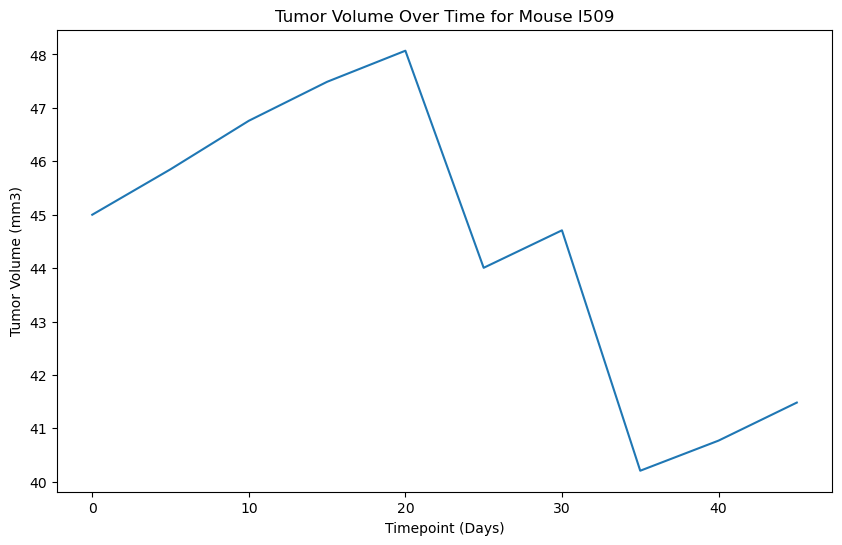

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_treatment = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capo_treatment.value_counts('Mouse ID')

# pick mouse I509
l509 =clean_df.loc[clean_df['Mouse ID'] == 'l509']
l509

fig1,ax1 = plt.subplots(figsize = (10,6))
capo_xaxis = l509['Timepoint']
capo_yaxis = l509['Tumor Volume (mm3)']
plt.plot(capo_xaxis, capo_yaxis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse l509")
plt.show()
    

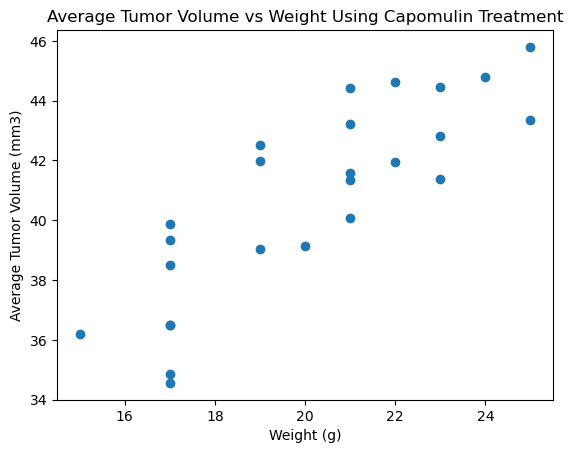

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capo_weight = capo_treatment.groupby(["Mouse ID"]).mean(['Weight (g)'])
plt.scatter(avg_capo_weight['Weight (g)'], avg_capo_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
plt.show()

## Correlation and Regression

The correlation coefficient is 0.841936342469472.
y = 0.95x + 21.55


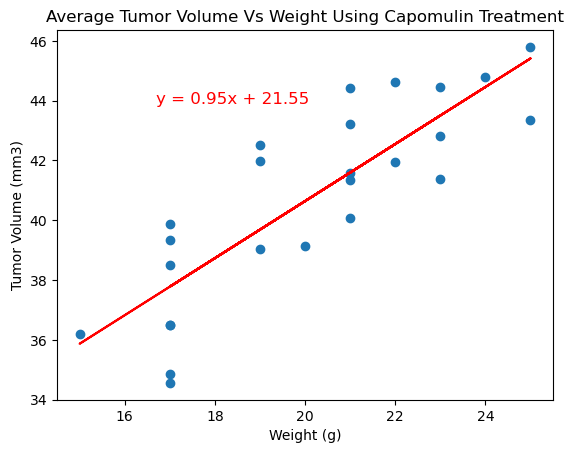

In [82]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corcoef = st.pearsonr(avg_capo_weight['Weight (g)'], avg_capo_weight['Tumor Volume (mm3)'])[0]
print(f'The correlation coefficient is {corcoef}.')

plt.scatter(avg_capo_weight['Weight (g)'], avg_capo_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

lin_xvalues = avg_capo_weight['Weight (g)']
lin_yvalues = avg_capo_weight['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lin_xvalues, lin_yvalues)
regress_val = lin_xvalues * slope + intercept
equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(equation)

plt.annotate(equation, xy = (20,40), xycoords = 'data', xytext = (0.2, 0.80), textcoords = 'axes fraction', fontsize = 12, color = 'red')
plt.plot(lin_xvalues, regress_val, 'r-')
plt.title('Average Tumor Volume Vs Weight Using Capomulin Treatment')
plt.show()
